In [3]:
# Fast, simple setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

RANDOM_STATE = 42
pd.set_option("display.max_columns", 100)


In [4]:
# Load
df = pd.read_csv('data.csv')
print("Shape:", df.shape)
print("First 5 rows:")
print(df.head())

# Drop obvious helper columns if present
df = df.drop(columns=[c for c in ['id', 'Unnamed: 32', 'Unnamed: 0'] if c in df.columns], errors='ignore')

# Missing values
print("\nMissing values per column:")
print(df.isna().sum())

# Simple handling for this challenge: drop NA rows
df = df.dropna()
print("\nShape after dropping NA rows:", df.shape)

# Safety check for target
if 'diagnosis' not in df.columns:
    raise ValueError("Column 'diagnosis' not found in the dataset.")


Shape: (569, 33)
First 5 rows:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  fractal_dimen

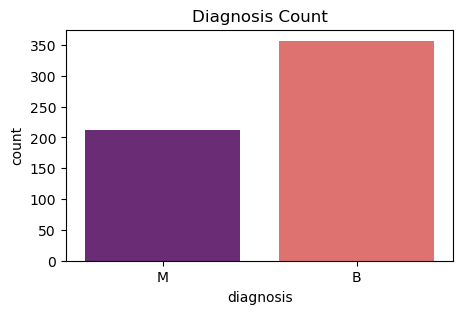


Diagnosis value counts:
diagnosis
B    357
M    212
Name: count, dtype: int64


In [5]:
plt.figure(figsize=(5,3))
sns.countplot(x='diagnosis', data=df, palette='magma')
plt.title('Diagnosis Count')
plt.show()

print("\nDiagnosis value counts:")
print(df['diagnosis'].value_counts())


In [6]:
# Map diagnosis to numeric (M=1, B=0)
y = df['diagnosis'].map({'M': 1, 'B': 0}).astype(int)

# Features = all numeric columns except 'diagnosis'
X = df.drop(columns=['diagnosis'])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=RANDOM_STATE
)
print("Train shape:", X_train.shape, " Test shape:", X_test.shape)

# Scale features (helps LR, KNN, SVM; RF is fine either way)
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s  = scaler.transform(X_test)


Train shape: (455, 30)  Test shape: (114, 30)


In [7]:
log_clf = LogisticRegression(max_iter=2000, random_state=RANDOM_STATE)
log_clf.fit(X_train_s, y_train)
log_pred = log_clf.predict(X_test_s)
log_acc = accuracy_score(y_test, log_pred)
print("Logistic Regression accuracy:", round(log_acc, 4))


Logistic Regression accuracy: 0.9649


In [8]:
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train_s, y_train)
knn_pred = knn_clf.predict(X_test_s)
knn_acc = accuracy_score(y_test, knn_pred)
print("KNN accuracy:", round(knn_acc, 4))


KNN accuracy: 0.9561


In [9]:
rf_clf = RandomForestClassifier(n_estimators=200, random_state=RANDOM_STATE)
rf_clf.fit(X_train, y_train)       # RF works fine on unscaled features
rf_pred = rf_clf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
print("Random Forest accuracy:", round(rf_acc, 4))


Random Forest accuracy: 0.9649


In [10]:
# Linear SVM is very fast; RBF is also fast here, but linear is guaranteed snappy.
svm_clf = SVC(kernel='linear', C=1.0, gamma='scale', random_state=RANDOM_STATE)
svm_clf.fit(X_train_s, y_train)
svm_pred = svm_clf.predict(X_test_s)
svm_acc = accuracy_score(y_test, svm_pred)
print("SVM (linear) accuracy:", round(svm_acc, 4))


SVM (linear) accuracy: 0.9649


In [11]:
scores = {
    "Logistic Regression": log_acc,
    "KNN": knn_acc,
    "Random Forest": rf_acc,
    "SVM (linear)": svm_acc
}
best_model = max(scores, key=scores.get)
print("Best model by accuracy:", best_model, "with score:", round(scores[best_model], 4))
print("All scores:", {k: round(v, 4) for k, v in scores.items()})


Best model by accuracy: Logistic Regression with score: 0.9649
All scores: {'Logistic Regression': 0.9649, 'KNN': 0.9561, 'Random Forest': 0.9649, 'SVM (linear)': 0.9649}
